In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
Crimedata=pd.read_csv('C:\\Users\\91741\\Downloads\\crime_data.csv')

In [3]:
Crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm=norm_func(Crimedata.iloc[:,1:])

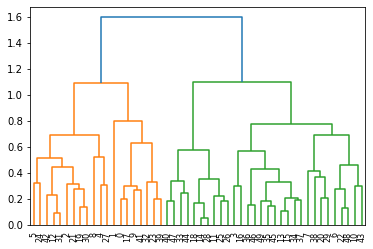

In [6]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [12]:
Crimedata.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [13]:
#screw plot or elbow curve
k=list(range(2,15))

In [14]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [16]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x49580d0>,
 <a list of 13 Text major ticklabel objects>)

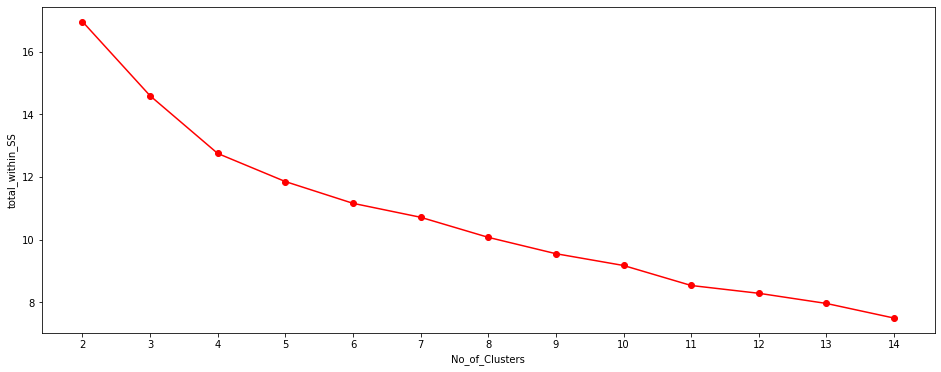

In [19]:
# Scree plot 

plt.figure(figsize=(16,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

# The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4.

In [20]:
#selecting 4 clustersfrom above scree plot which is the optimum number of cluster
model=KMeans(n_clusters=4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [21]:
model.labels_# getting the labels of clusters assigned to each row 

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [22]:
model.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [25]:
import seaborn as sn

In [27]:
X=Crimedata[['Murder','Assault','Rape','UrbanPop']]
clusters=KMeans(4)
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_
Crimedata['Crime_clusters']=clusters.labels_
Crimedata.head()
Crimedata.sort_values(by=['Crime_clusters'],ascending=True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [29]:
stats=Crimedata.sort_values('Murder',ascending=True)
stats

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Crime_clusters
33,North Dakota,0.8,45,44,7.3,2
28,New Hampshire,2.1,57,56,9.5,2
18,Maine,2.1,83,51,7.8,2
14,Iowa,2.2,56,57,11.3,2
44,Vermont,2.2,48,32,11.2,2
48,Wisconsin,2.6,53,66,10.8,2
11,Idaho,2.6,120,54,14.2,3
22,Minnesota,2.7,72,66,14.9,2
43,Utah,3.2,120,80,22.9,3
6,Connecticut,3.3,110,77,11.1,3


C:\Users\91741\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


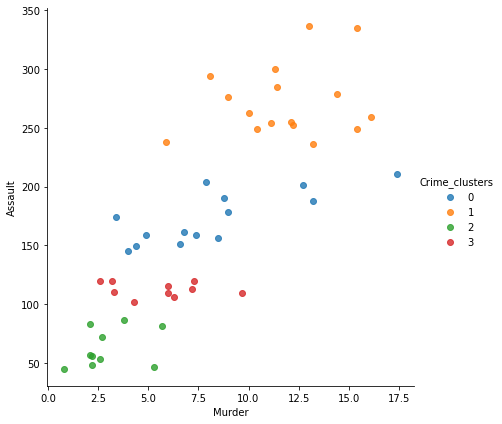

In [31]:
#plot between muder and assault
sn.lmplot('Murder','Assault',data=Crimedata,
          hue='Crime_clusters',
           fit_reg=False,size=6);

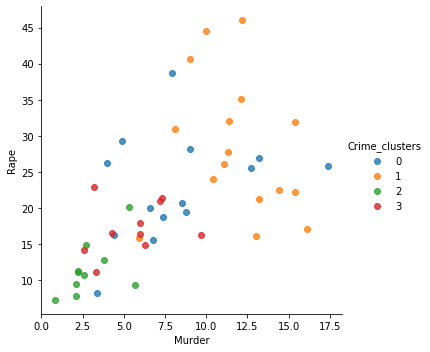

In [32]:
#plot between murder and rape
sn.lmplot('Murder','Rape',data=Crimedata,
           hue='Crime_clusters',
           fit_reg=False,size=5);

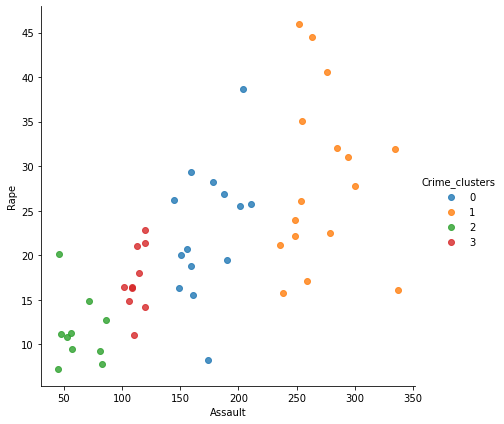

In [33]:
#plot between assault and rape
sn.lmplot('Assault','Rape',data=Crimedata,
           hue='Crime_clusters',
            fit_reg=False,size=6)